<a href="https://colab.research.google.com/github/Ragnarok540/sympy-tutorial/blob/main/sir_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# https://www.youtube.com/watch?v=zpYMiJd3pqg

import sympy as smp
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [ ]:
s, i, r, beta, gamma, n  = smp.symbols('s i r beta gamma n')

In [ ]:
ds_dt = - (beta / n) * s * i
ds_dt

-beta*i*s/n

In [ ]:
di_dt = (beta / n) * s * i - gamma * i
di_dt

beta*i*s/n - gamma*i

In [ ]:
dr_dt = gamma * i
dr_dt

gamma*i

In [ ]:
fun_s = ds_dt.subs([(beta, 0.39), (n, 1.1e7)])
fun_i = di_dt.subs([(beta, 0.39), (n, 1.1e7), (gamma, 1 / 10)])
fun_r = dr_dt.subs([(gamma, 1 / 10)])

[fun_s, fun_i, fun_r]

[-3.54545454545455e-8*i*s, 3.54545454545455e-8*i*s - 0.1*i, 0.1*i]

In [ ]:
nfun_s = smp.lambdify([i, s], fun_s)
nfun_i = smp.lambdify([i, s], fun_i)
nfun_r = smp.lambdify([i, s], fun_r)

def func(a, t):
  s = a[0]
  i = a[1]
  r = a[2]
  return [nfun_s(i, s), nfun_i(i, s), nfun_r(i, s)]

t = np.arange(0, 100, 1)
s0 = 1.1e7 - 574
i0 = 574
r0 = 0

sol = odeint(func, y0=[s0, i0, r0], t=t)

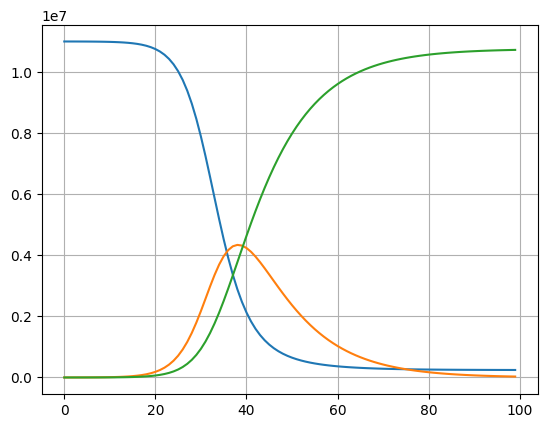

In [ ]:
sol_s = sol.T[0]
sol_i = sol.T[1]
sol_r = sol.T[2]

plt.plot(t, sol_s)
plt.plot(t, sol_i)
plt.plot(t, sol_r)
plt.grid()